LSTM只会将有用的东西记下来，而不像RNN记忆所有的

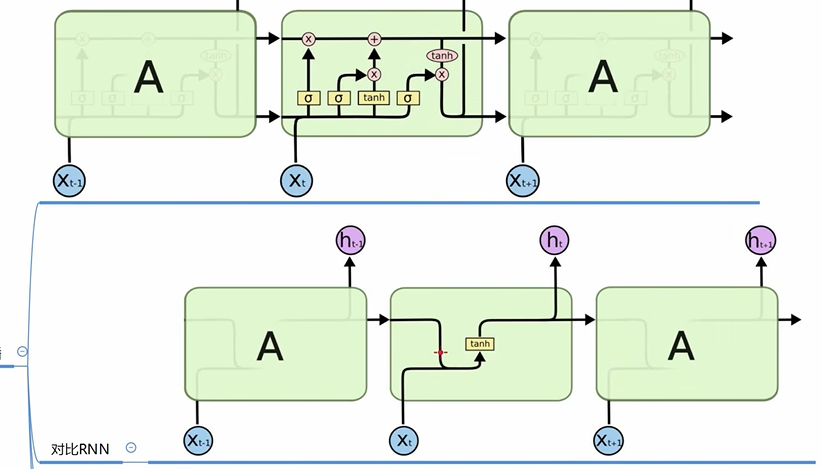

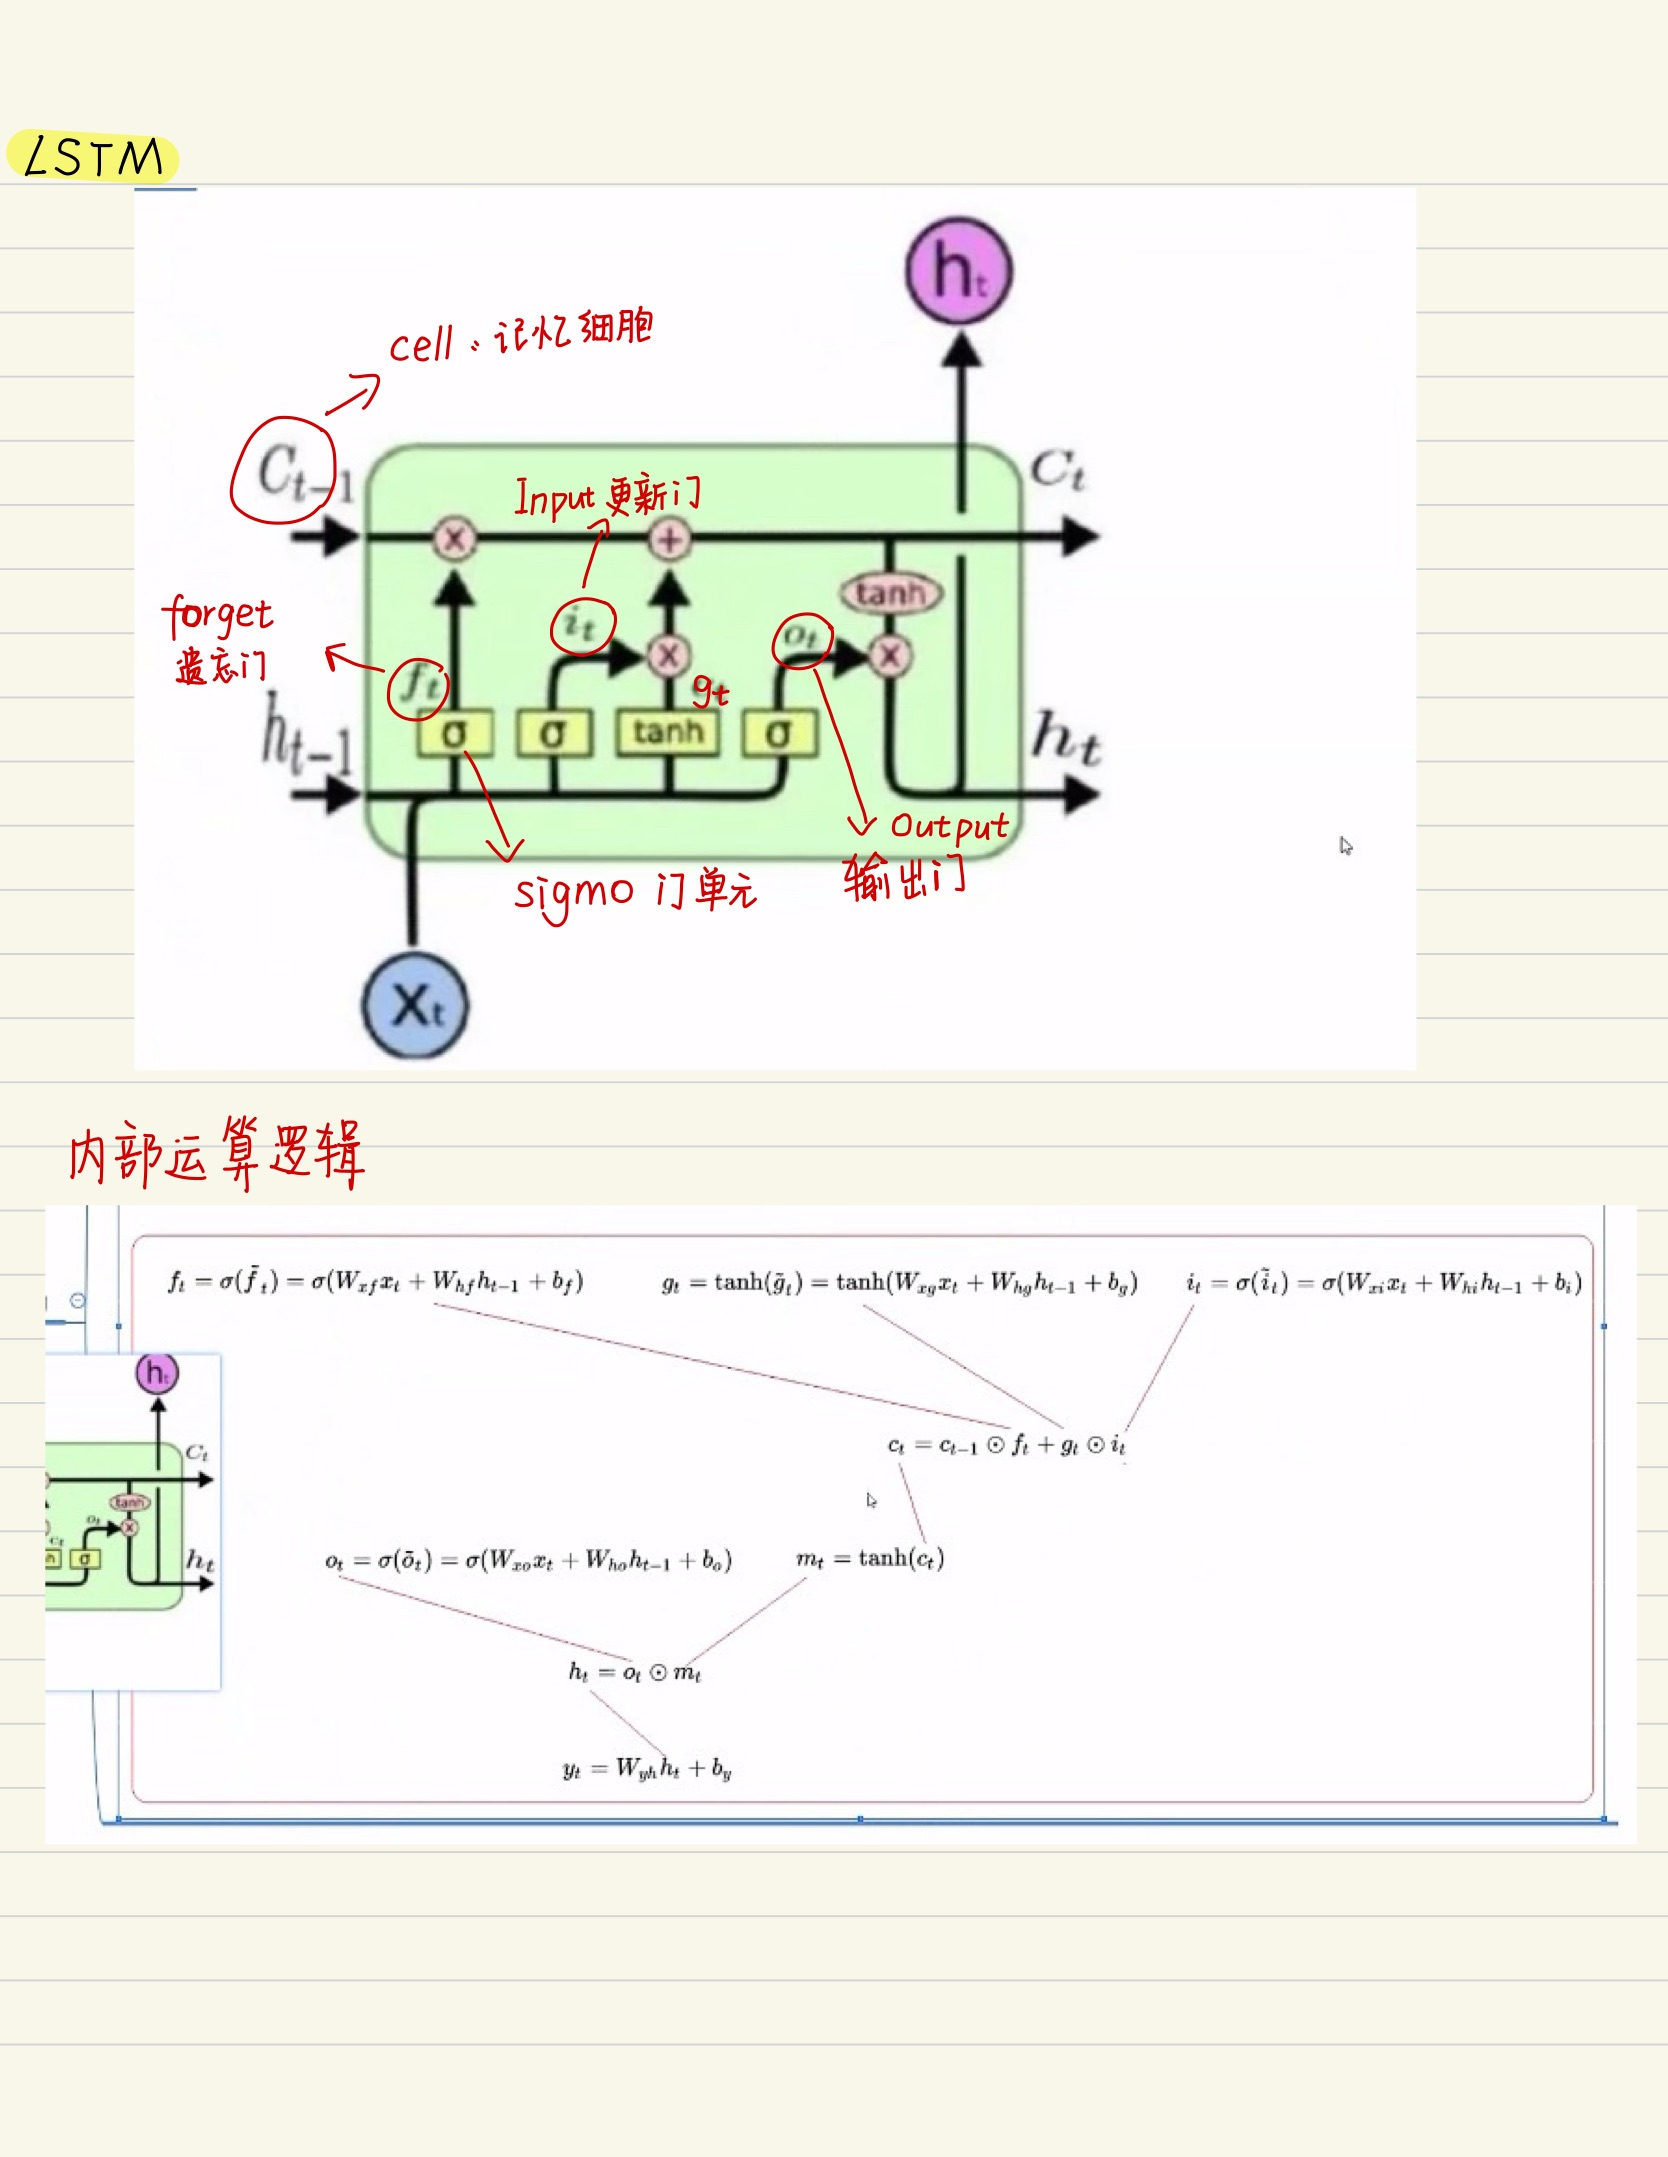

In [2]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # LSTM 层
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        # 全连接层
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # 初始化隐藏状态和细胞状态
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # 前向传播 LSTM
        out, _ = self.lstm(x, (h0, c0))

        # 取最后一个时间步的输出
        out = out[:, -1, :]

        # 全连接层
        out = self.fc(out)
        return out